Logistic Regression ASL Model
<br>
<br>
Ankit Dheendsa - Brainstation
<br>
September 2023

The goal of running a logistic regression model on the numerical dataset is to create a baseline model and to test the validity of potentially creating deep learning models that translates ASL hand signs into written text using numerical data rather than traditional image data and image clustering methods. We would also like to test the accuracy and speed of predictions of the logistic regression in comparison to the speed of predictions of a CNN model to see which model overall performs better and if there are ways of optimizing our modelling to create the best model possible for this solution.

To start our logistic regression model, lets first import all the necessary modules, packages and libraries

In [1]:
# Required imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib

Considering our logistic regression will be trained and tested on tabular data (x and y coordinates of different landmark positions for different ASL hand signs), we will need to create a list of all the csv files we will be pulling our numerical data from. Once that is done we can create an empty list that will be used to store data frames later on, as well as create a list that will store all the different class names/labels of the different signs we will be training and testing this model on. 
<br>
<br>
In our case we will train the model on numerical data that represents the ASL signs for 'A', 'N', 'K', 'I', 'T', 'HELLO', 'B', 'C'

In [2]:
# List of the csv file paths we will be pulling x,y coordinates from
csv_file_paths = ["CSV/A.csv","CSV/N.csv","CSV/K.csv","CSV/I.csv","CSV/T.csv","CSV/HELLO.csv","CSV/B.csv","CSV/C.csv"]

# Here we initialize an empty list to store DataFrames and sign labels
dfs = []
sign_labels = ['A', 'N', 'K', 'I', 'T', 'HELLO', 'B', 'C']

Now we need to populate our dfs variable. We will load each of the csv files whilst adding the "Sign" column and then append it to the list as a target column to give the logistic regression a target column to refer to as a means of determining its prediction accuracy.

In [4]:
# Next we will load each CSV file, add the "Sign" column, and append to the list as a target column 
# The reason for this is to give the logistic regression a column to refer to as a means of determining if its prediction 
# was accurate or not
for file_path, sign_label in zip(csv_file_paths, sign_labels):
    df = pd.read_csv(file_path)
    df['Sign'] = sign_label
    dfs.append(df)

Moving on we will concatenate the dataframes into a single data frame that can be passed into the model. Once we have done that we will use a label encoder to encode the target column to change the string formatting of the labels (different letters and words) to a numerical representation. 
<br>
<br>
Once that is accomplished we will extract the categorical features (Image and Sign) and move on to splitting the data into training and testing sets.

In [6]:
# Next we will concatenate the DataFrames into a single DataFrame to be passed into the model
combined_df = pd.concat(dfs, ignore_index=True)

# Encode the target labels (since they are string objects we will need to give them numerical representations)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(combined_df['Sign'])

# Extract categorical features ("Image" column has the names of each image, and the "Sign" column has the specific ASL
# sign that the rows data refers to)
X = combined_df.drop(["Image", "Sign"], axis=1)

# Here we split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Once the dataframe has been split into training and testing sets we will convert all the landmark coordinate data to numeric values to ensure string objects arent being passed (upon data accumulation, values created in the csv files were natively string objects). We can use print statements to ensure that the columns that should be float values have been successfully converted.

In [7]:
# Convert landmark position columns to numeric values (they are originally stored as string object types)
numeric_columns = X.columns
X_train[numeric_columns] = X_train[numeric_columns].apply(pd.to_numeric, errors='coerce')
X_test[numeric_columns] = X_test[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Print statements to make sure the data being passed in is indeed integer/float values
print(X_train.dtypes)
print(X_test.dtypes)


Landmark 0_X     float64
Landmark 1_X     float64
Landmark 2_X     float64
Landmark 3_X     float64
Landmark 4_X     float64
Landmark 5_X     float64
Landmark 6_X     float64
Landmark 7_X     float64
Landmark 8_X     float64
Landmark 9_X     float64
Landmark 10_X    float64
Landmark 11_X    float64
Landmark 12_X    float64
Landmark 13_X    float64
Landmark 14_X    float64
Landmark 15_X    float64
Landmark 16_X    float64
Landmark 17_X    float64
Landmark 18_X    float64
Landmark 19_X    float64
Landmark 20_X    float64
Landmark 0_Y     float64
Landmark 1_Y     float64
Landmark 2_Y     float64
Landmark 3_Y     float64
Landmark 4_Y     float64
Landmark 5_Y     float64
Landmark 6_Y     float64
Landmark 7_Y     float64
Landmark 8_Y     float64
Landmark 9_Y     float64
Landmark 10_Y    float64
Landmark 11_Y    float64
Landmark 12_Y    float64
Landmark 13_Y    float64
Landmark 14_Y    float64
Landmark 15_Y    float64
Landmark 16_Y    float64
Landmark 17_Y    float64
Landmark 18_Y    float64


In order to make sure that the dataframe doesnt have null values that can impede in our model we will populate any possible null values that might have arisen with the mean for that column. This is a suitable method considering that it is a redundancy method and should be needed, but even if it is needed the mean value of the column wouldnt impede in the sign translation due to the fact that there are many seperate feature ranges that cumulitavely translate into a sign. Therefore, a single averaged value will not cause harm in predicting signs accurately.

In [8]:
# As a redundancy measure, if there are any missing values we populate it with the mean for the numerical columns
# The mean as a fill method is suitable for this dataset as we are working with positional data
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

Moving on, we can now initialize and train the logistic regression model. As a bonus feature we can add progress bars using the tqdm library to see progress over time (giving us a good idea of how long it will take).

In [ ]:
# Next, we can initialize and train the logistic regression model
model = LogisticRegression(multi_class='auto', solver='lbfgs')

# We can fit the model with a progress bar to see its progress over time (this way we can determine how long it will take
# to train and test approximately, and more so of a convenience factor)
with tqdm(total=100, desc="Training Progress") as pbar:
    for _ in range(100):
        model.fit(X_train, y_train_encoded) 
        pbar.update(1)

Now that the model has been trained we will use the joblib library to save the model and encoder so that way we can import them into other scripts (we will use this file in our demo script).

In [10]:
# Next we will save the trained model using joblib so that way we can import it into other scripts (we will use this for the demo)
# This way when the script is done running it will create two new files, one for the saved model and another for the saved encoder
model_filename = 'trained_logistic_regression_model.joblib'
joblib.dump(model, model_filename)

# We will also save the label encoder
label_encoder_filename = 'label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_filename)

['label_encoder.joblib']

Once the files have been saved, we can move on to making predictions using the model. We will pass in our X_test variable and perform an inverse transform on the encoded predictions.

In [11]:
# Now we can make predictions
y_pred_encoded = model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test = label_encoder.inverse_transform(y_test_encoded)

Now that the model has been trained and tested we can take a look into its accuracy as well as other metrics, we will first start by creating a classification report.

In [14]:
# Map the class indices to the sign labels in the same order as our "sign_labels" list to ensure correct label mapping to report data
class_labels_ordered = [sign_labels[i] for i in range(len(sign_labels))]

# Generate and print the classification report with the correct class labels order
report = classification_report(y_test, y_pred, target_names=class_labels_ordered)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       389
           N       0.96      0.88      0.92       527
           K       0.87      0.95      0.91       401
           I       0.99      1.00      0.99       424
           T       1.00      0.99      1.00       400
       HELLO       1.00      1.00      1.00       420
           B       0.98      0.99      0.99       391
           C       0.99      0.96      0.97       422

    accuracy                           0.97      3374
   macro avg       0.97      0.97      0.97      3374
weighted avg       0.97      0.97      0.97      3374



We can see from the classification report that the logistic regression model performed extremely well. It scored an average accuracy rating of 97% across all classes and the only class with an accuracy lower than 90% was for the letter 'C'. The regression models performance is the outcome of a clean data set with accurate and distinctive numerical representations of different hand signs. Based on this report we can conclude that the logistic regression performs extremely well for still image data being passed to it.

Although the logistic regression model performed very well it is still important to see where it predicted right values and where it predicted inaccurate values. Thus, we can use a confusion matrix to see where the model had trouble predicting as a means of diagnosing important issues so that we can continue to build on it to make it more accurate.

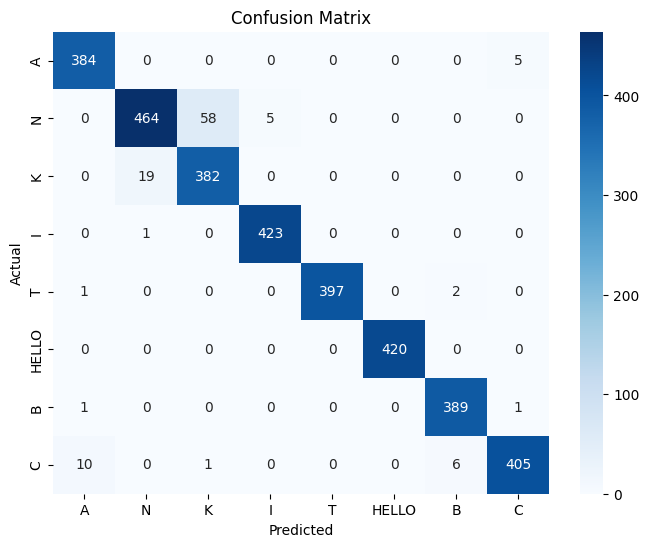

In [13]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sign_labels, yticklabels=sign_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can see that the letter 'K' had the most false positives with the model predicting that it was the letter 'N', with a total number of false predictions being 58. The second highest inaccuracy class was for the letter 'N', where the model had predicted that it was the letter 'K'. Considering the two highest inaccuracy ratings came from a correlated pair of classes we can see that those two classes in particular would need to be reassessed in terms of the raw data and pre processing methods to help make it more accurate.